### 🚀**Objetivo: Contar la historia del mercado de móviles en Perú**
### 💻Bussiness Case:
La empresa consultora **UdeP Analytical Solutions**  ha sido contratada por Claro para analizar la evolución del mercado de telecomunicaciones peruano desde 2013, cuando dos fuertes competidores, Entel y Bitel, ingresaron al mercado.

La consultora ha decidido comenzar desde lo más alto, analizando la dinámica del mercado de telecomunicaciones por cuota de mercado, líneas de producto y segmentos. 

El objetivo del encargo es dar a Claro una visión tanto del mercado como de su posición particular en el mismo. Claro califica al consultor por la veracidad de la respuesta, por la capacidad de comunicación y el formato de la presentación. 

In [1]:
#loading all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import functools
from decimal import Decimal
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from scipy.interpolate import make_interp_spline
from PIL import Image
import squarify
import plotly.express as px


In [2]:
# loading data from all files in the folder separately
folder_path = 'C:\\Users\\USER\\Desktop\\Parcial_TEE\\parcial_TEE_project_storytelling\\data'
file_paths = glob.glob(os.path.join(folder_path, '*.csv'))

data = {}
for file_path in file_paths:
    data[os.path.basename(file_path)] = pd.read_csv(file_path, sep=',')
#opening the files
ingresos = data['ingresos_df.csv']
moviles = data['moviles_df.csv']

### **Ingresos del mercado total** 💸
1. **¿Cuánto factura anualmente el mercado de telecomunicaciones en el Perú (todos las líneas de negocio) y ¿Cuál es la tasa de crecimiento anualizada del mercado del 2013 al 2021?** 

In [3]:
# facturación anual del mercado de telecomunicaciones en el Perú en todas las lineas de negocio
ingresos_total = ingresos.groupby(['Año']).agg({'Ingresos soles':'sum'}).reset_index()
ingresos_total['Tasa de crecimiento(%)'] = ingresos_total['Ingresos soles'].pct_change()*100  # tasa de crecimiento anual evolución de los ingresos
print(f'Anualmente el mercado de telecomunicaciones peruano factura en promedio {int(ingresos_total["Ingresos soles"].mean()/1000000000)} mil millones de soles')
print(f'La tasa de crecimiento anual promedio de los ingresos del mercado de telecomunicaciones en el Perú es de {round(ingresos_total["Tasa de crecimiento(%)"].mean(),2)}%')
ingresos_total

Anualmente el mercado de telecomunicaciones peruano factura en promedio 18 mil millones de soles
La tasa de crecimiento anual promedio de los ingresos del mercado de telecomunicaciones en el Perú es de 4.0%


,Año,Ingresos soles,Tasa de crecimiento(%)
0,2013,15245489131,NaN
1,2014,16633430993,9.103951
2,2015,17689307310,6.347917
3,2016,18181457364,2.782190
4,2017,18516442418,1.842454
5,2018,18824293950,1.662585
6,2019,19509399106,3.639473
7,2020,17405010796,-10.786536
8,2021,20430665240,17.383813


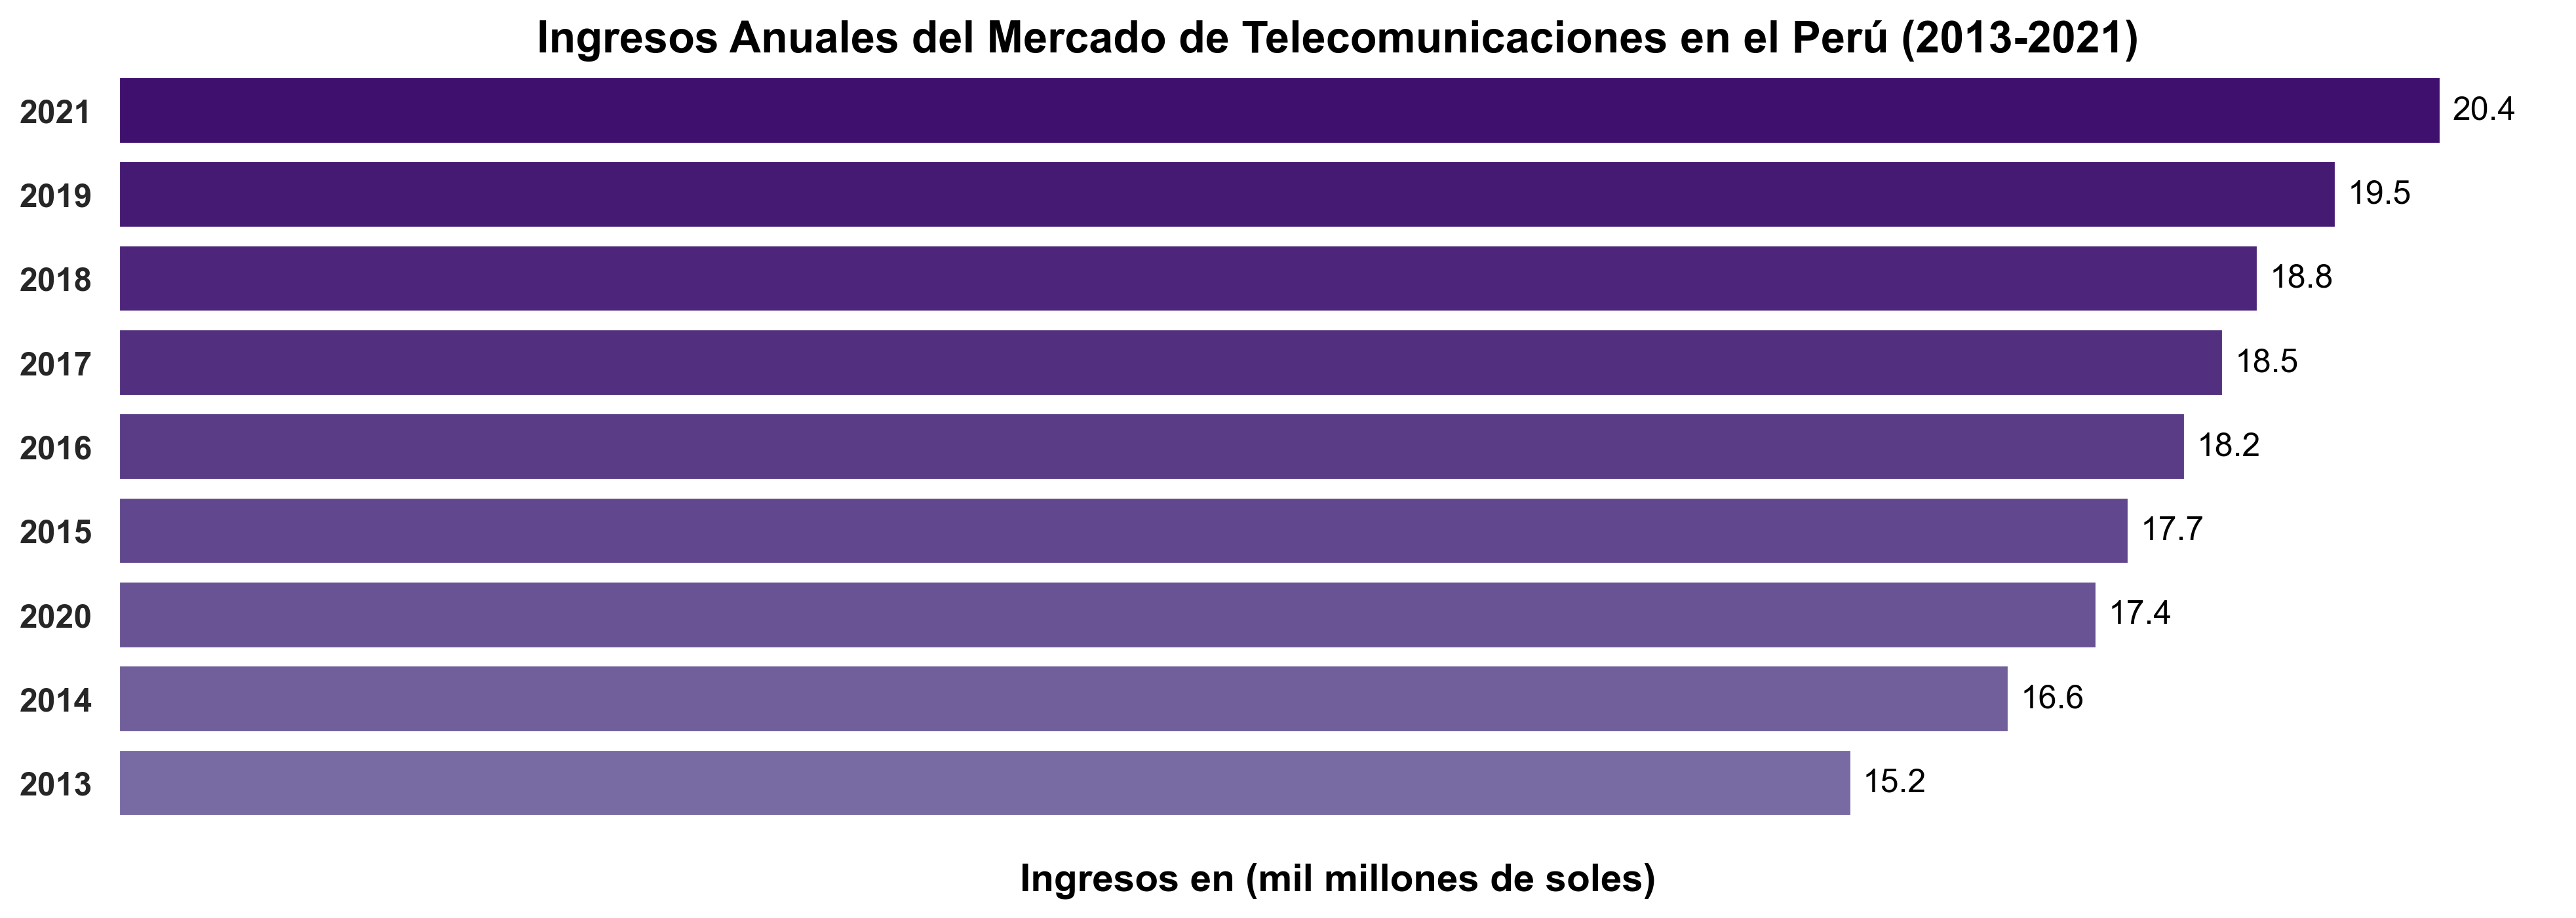

In [4]:
# Convertir los ingresos a mil millones
ingresos_total_anual = ingresos_total.copy()
ingresos_total_anual['Ingresos soles (mil millones)'] = ingresos_total_anual['Ingresos soles'] / 1000000000

# Ordenar por ingresos de mayor a menor
ingresos_total_anual = ingresos_total_anual.sort_values('Ingresos soles (mil millones)', ascending=False)

# Crear el gráfico de barras horizontal
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(16, 5), dpi=300)  # Tamaño de la figura y resolución
colors = plt.cm.Purples(np.linspace(1, 0.7, len(ingresos_total_anual)))  # Colores de las barras
ax = sns.barplot(
    x='Ingresos soles (mil millones)', 
    y='Año', 
    data=ingresos_total_anual, 
    palette=colors, 
    orient='h',
    order=ingresos_total_anual['Año']
)
sns.despine(left=True,bottom=True)  # Quitar los bordes de la gráfica
plt.xlabel('Ingresos en (mil millones de soles)', fontsize=14, color='black', weight='bold')
plt.ylabel('')
plt.title('Ingresos Anuales del Mercado de Telecomunicaciones en el Perú (2013-2021)', fontsize=16, color='black', weight='bold')
plt.gca().set_xticklabels([])
plt.yticks(fontsize=12, weight='bold')
# Añadir los valores encima de las barras
for index, value in enumerate(ingresos_total_anual['Ingresos soles (mil millones)']):
    ax.text(value+0.1, index, f'{value:.1f}', color='black', ha="left", va="center")

# Mostrar el gráfico
plt.show()

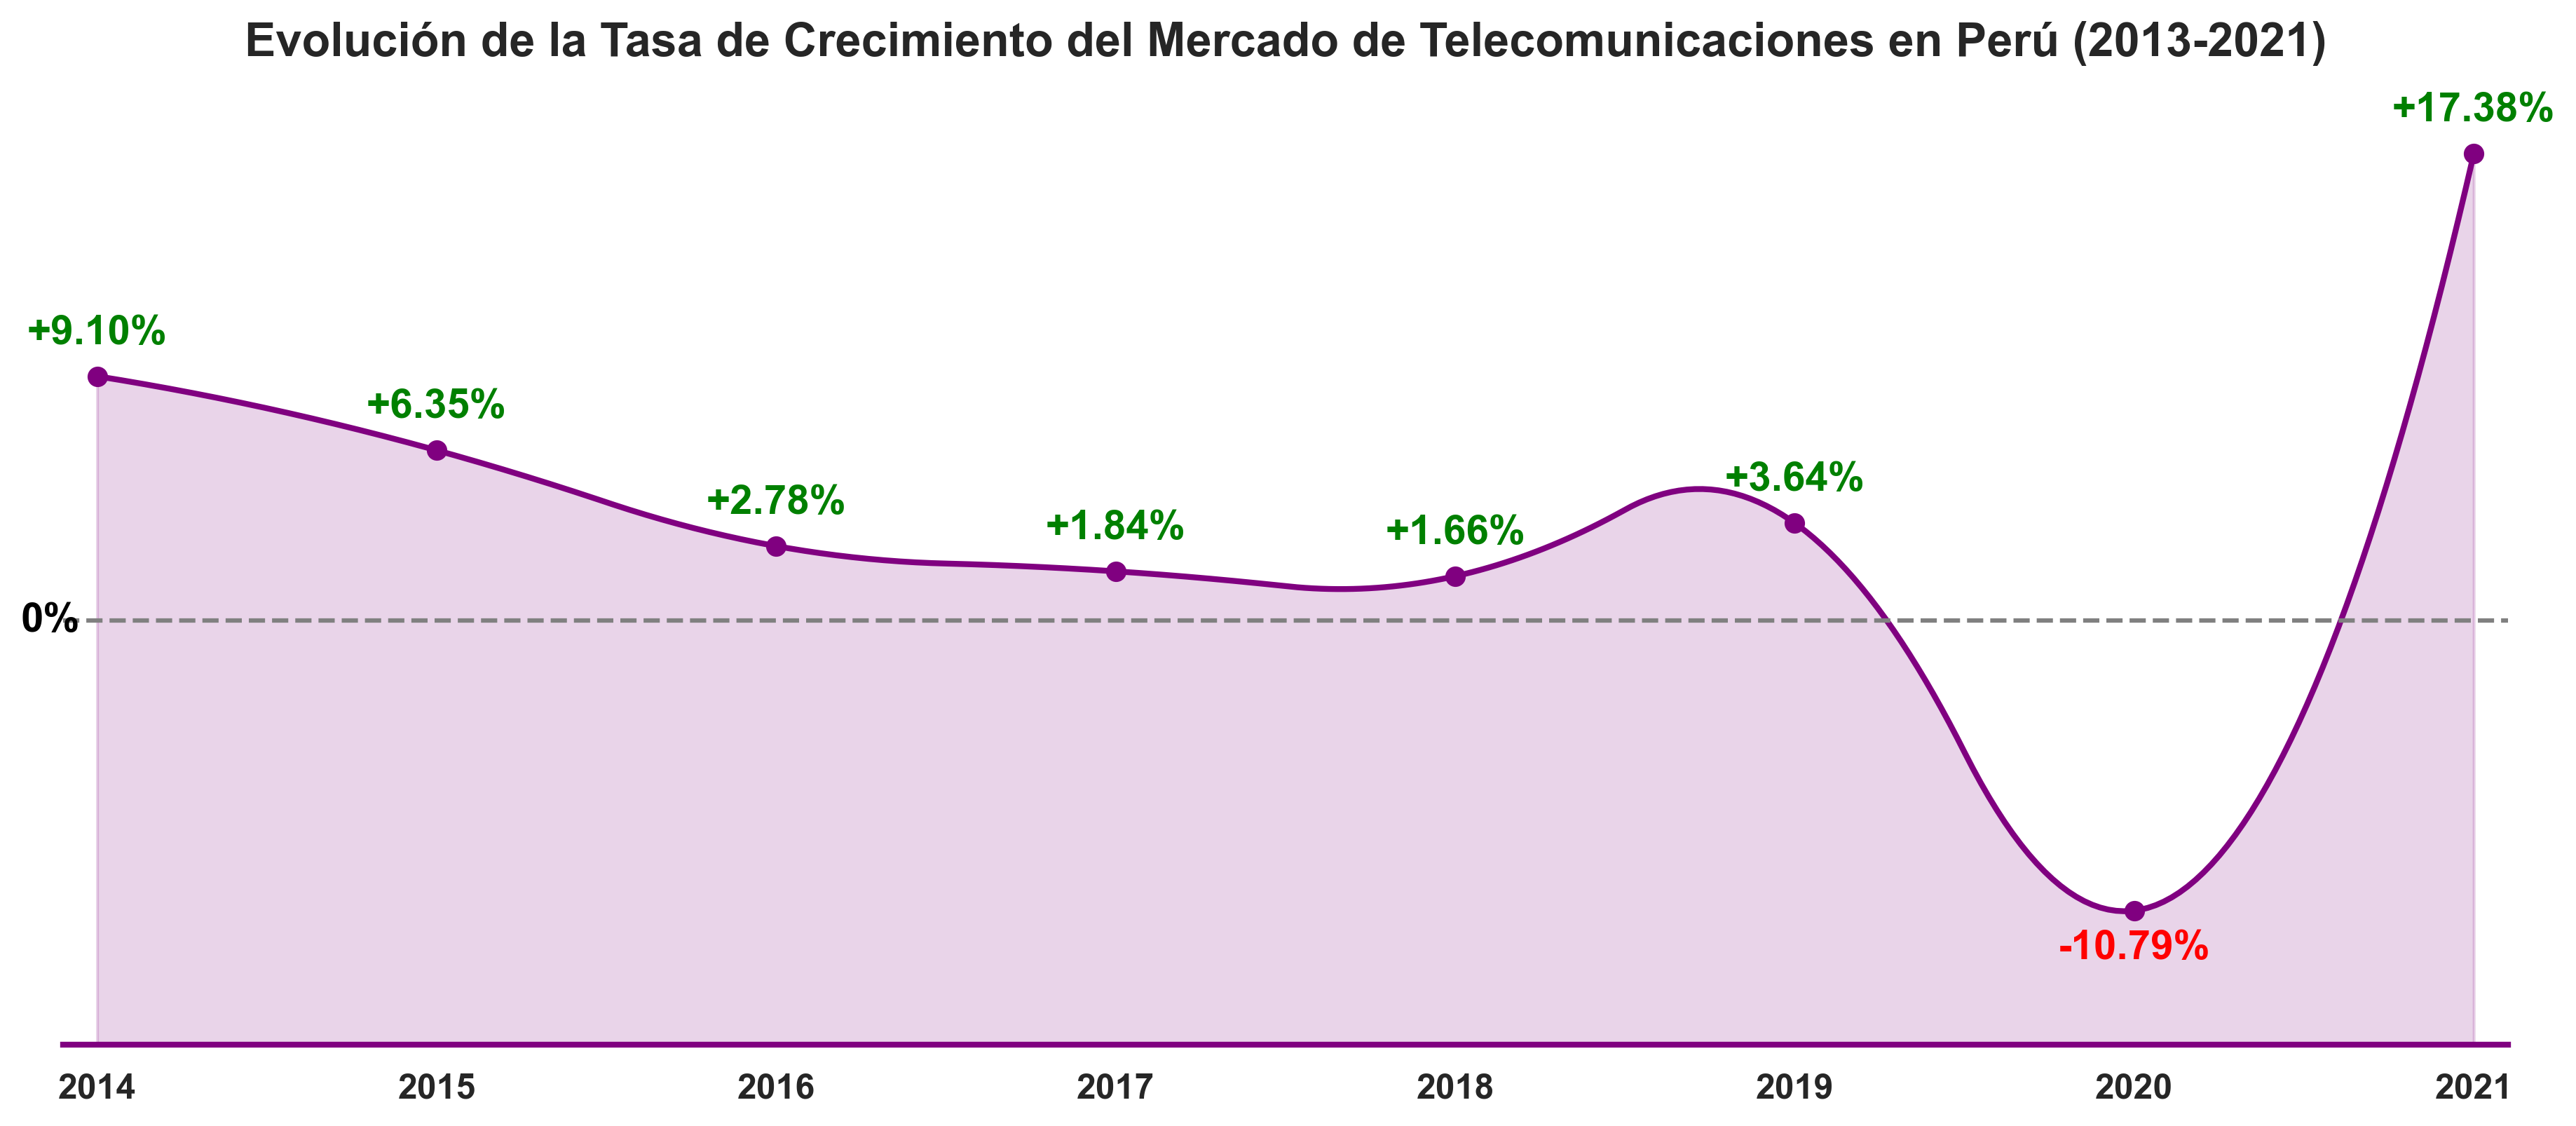

In [5]:
# Graficando la evolución
ingresos_total_df = ingresos_total_anual.dropna().sort_values(by='Año')
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(15, 6), dpi=300)
x = ingresos_total_df['Año']
y = ingresos_total_df['Tasa de crecimiento(%)']

# Crear una línea suavizada
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=2)  # B-spline de grado 2
y_smooth = spl(x_new)

plt.plot(x_new, y_smooth, color='purple', linewidth=2)
plt.scatter(x, y, color='purple')  # Puntos originales

# Añadir etiquetas a los puntos
for x_val, y_val in zip(x, y):
    if y_val > 0:
        plt.text(x_val, y_val + 0.9, f'+{y_val:.2f}%', ha='center', va='bottom', fontsize=14, weight='bold', color='green')
    else:
        plt.text(x_val, y_val - 0.7, f'{y_val:.2f}%', ha='center', va='top', fontsize=14, weight='bold', color='red')

# Ajustar los límites del eje y
plt.ylim(y.min() - 5, y.max() + 3)

# Ajustar los límites del eje x
plt.xlim(x.min()-0.1, x.max()+0.1)

# Crear un efecto desenfocado de color hacia abajo desde la línea del gráfico
ax = plt.gca()
ax.set_facecolor('white')
ax.patch.set_alpha(0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('purple')
    spine.set_linewidth(2)
    spine.set_visible(True)

# Rellenar el área bajo la curva con un gradiente de color uniforme
plt.fill_between(x_new, y_smooth, y.min() - 5, color='purple', alpha=0.17)

sns.despine(left=True)
plt.title('Evolución de la Tasa de Crecimiento del Mercado de Telecomunicaciones en Perú (2013-2021)', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.text(x.min()-0.05, 0, '0%', ha='right', va='center', fontsize=14, color='black', weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.gca().set_yticklabels([])

# Mostrar el gráfico
plt.show()

### 📊 **Evolución del Crecimiento del Mercado de Telecomunicaciones en Perú (2013-2021)**

Este gráfico muestra la evolución de la **Tasa de Crecimiento** del mercado de telecomunicaciones en Perú entre 2013 y 2021. A continuación, señalaremos algunos puntos clave con stickers:

#### 📈 **Puntos de Crecimiento Positivo**
- **2014:** 🟢 **+9.10%** - Fuerte crecimiento al inicio del periodo.
- **2015:** 🟢 **+6.35%** - Sigue el crecimiento, aunque desacelera un poco.
- **2016:** 🟢 **+2.78%** - La tendencia de crecimiento continúa a la baja.
- **2017:** 🟢 **+1.84%** - Crecimiento mínimo, pero aún positivo.
- **2018:** 🟢 **+1.66%** - Se mantiene el crecimiento, aunque pequeño.
- **2019:** 🟢 **+3.64%** - Un ligero repunte en la tasa de crecimiento.
- **2021:** 🟢 **+17.38%** - 🤩 ¡Gran recuperación después de la caída en 2020!

#### 📉 **Punto de Crecimiento Negativo**
- **2020:** 🔴 **-10.79%** - 😓 La pandemia impacta fuertemente el mercado, con la mayor caída en el periodo.

#### 📌 **Observaciones Generales**
- El **pico más alto** de crecimiento ocurre en **2021** con un impresionante **+17.38%** tras la recuperación post-pandemia.
- La **caída más pronunciada** ocurre en **2020** con **-10.79%**, coincidiendo con la pandemia.
- A lo largo de los años, el mercado muestra una **tendencia descendente** desde **2014** hasta **2017**, con un pequeño repunte en **2019** y una **fuerte recuperación** en **2021**.

---

**Conclusión:**  
A pesar de la caída drástica en 2020, debido al impacto de la pandemia, el mercado de telecomunicaciones en Perú se recuperó significativamente en 2021, alcanzando una tasa de crecimiento sin precedentes en este período.

2. **Replicar el mismo gráfico solo para Claro** <img src="image.png" alt="alt text" width="40" height="40"> 

In [6]:
# facturación anual del mercado de telecomunicaciones en el Perú por compañía en todas las lineas de negocio
ingresos_total_compañias_anual = ingresos.groupby(['Año', 'Compañia']).agg({'Ingresos soles': 'sum'}).reset_index()
# facturación anual solo para claro
ingresos_claro = ingresos_total_compañias_anual[ingresos_total_compañias_anual['Compañia'] == 'Claro']
ingresos_claro['Tasa de crecimiento(%)'] = ingresos_claro['Ingresos soles'].pct_change() * 100  # tasa de crecimiento anual evolución de los ingresos
print(f'Anualmente Claro factura en promedio {int(ingresos_claro["Ingresos soles"].mean() / 1000000000)} mil millones de soles')
print(f'La tasa de crecimiento anual promedio de los ingresos de Claro es de {round(ingresos_claro["Tasa de crecimiento(%)"].mean(), 2)}%')
ingresos_claro

Anualmente Claro factura en promedio 5 mil millones de soles
La tasa de crecimiento anual promedio de los ingresos de Claro es de 3.39%


,Año,Compañia,Ingresos soles,Tasa de crecimiento(%)
0,2013,Claro,4922299998,NaN
6,2014,Claro,5435843002,10.432989
12,2015,Claro,5456522486,0.380428
18,2016,Claro,5446446418,-0.184661
24,2017,Claro,5728623801,5.180945
30,2018,Claro,5856223769,2.227410
36,2019,Claro,6090842707,4.006318
42,2020,Claro,5222505451,-14.256439
48,2021,Claro,6231093740,19.312345


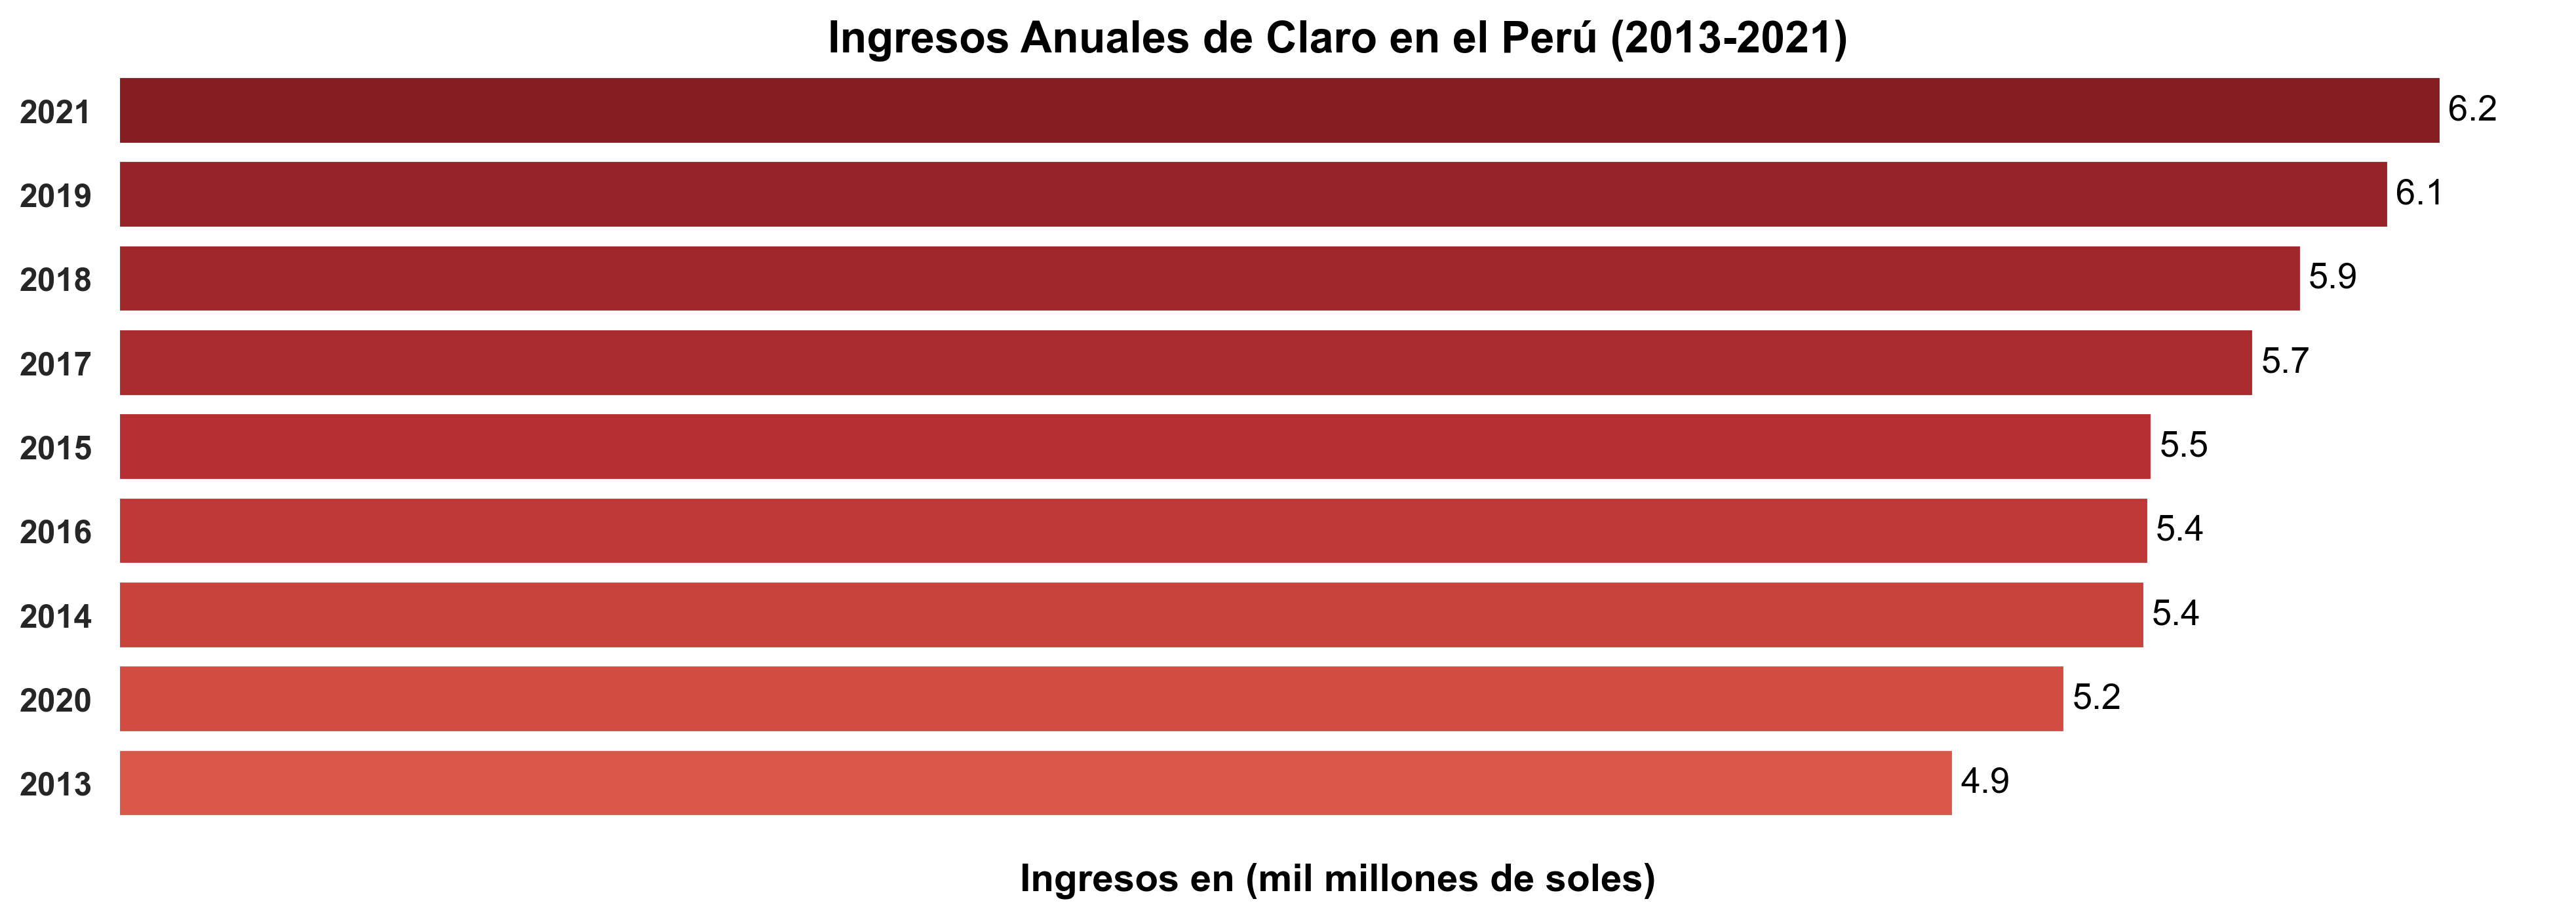

In [7]:
# Convertir los ingresos a mil millones
ingresos_claro_anual = ingresos_claro.copy()
ingresos_claro_anual['Ingresos soles (mil millones)'] = ingresos_claro_anual['Ingresos soles'] / 1000000000

# Ordenar por ingresos de mayor a menor
ingresos_claro_anual = ingresos_claro_anual.sort_values('Ingresos soles (mil millones)', ascending=False)

# Crear el gráfico de barras horizontal
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(16, 5), dpi=300)  # Tamaño de la figura y resolución
colors = plt.cm.Reds(np.linspace(0.9, 0.6, len(ingresos_claro_anual)))
ax = sns.barplot(
    x='Ingresos soles (mil millones)', 
    y='Año', 
    data=ingresos_claro_anual, 
    palette=colors, 
    orient='h',
    order=ingresos_claro_anual['Año']
)
sns.despine(left=True, bottom=True)  # Quitar los bordes de la gráfica
plt.xlabel('Ingresos en (mil millones de soles)', fontsize=14, color='black', weight='bold')
plt.ylabel('')
plt.title('Ingresos Anuales de Claro en el Perú (2013-2021)', fontsize=16, color='black', weight='bold')
plt.gca().set_xticklabels([])
plt.yticks(fontsize=12, weight='bold')
# Añadir los valores encima de las barras
for index, value in enumerate(ingresos_claro_anual['Ingresos soles (mil millones)']):
    ax.text(value + 0.02, index, f'{value:.1f}', color='black', ha="left", va="center", fontsize=13)

# Mostrar el gráfico
plt.show()

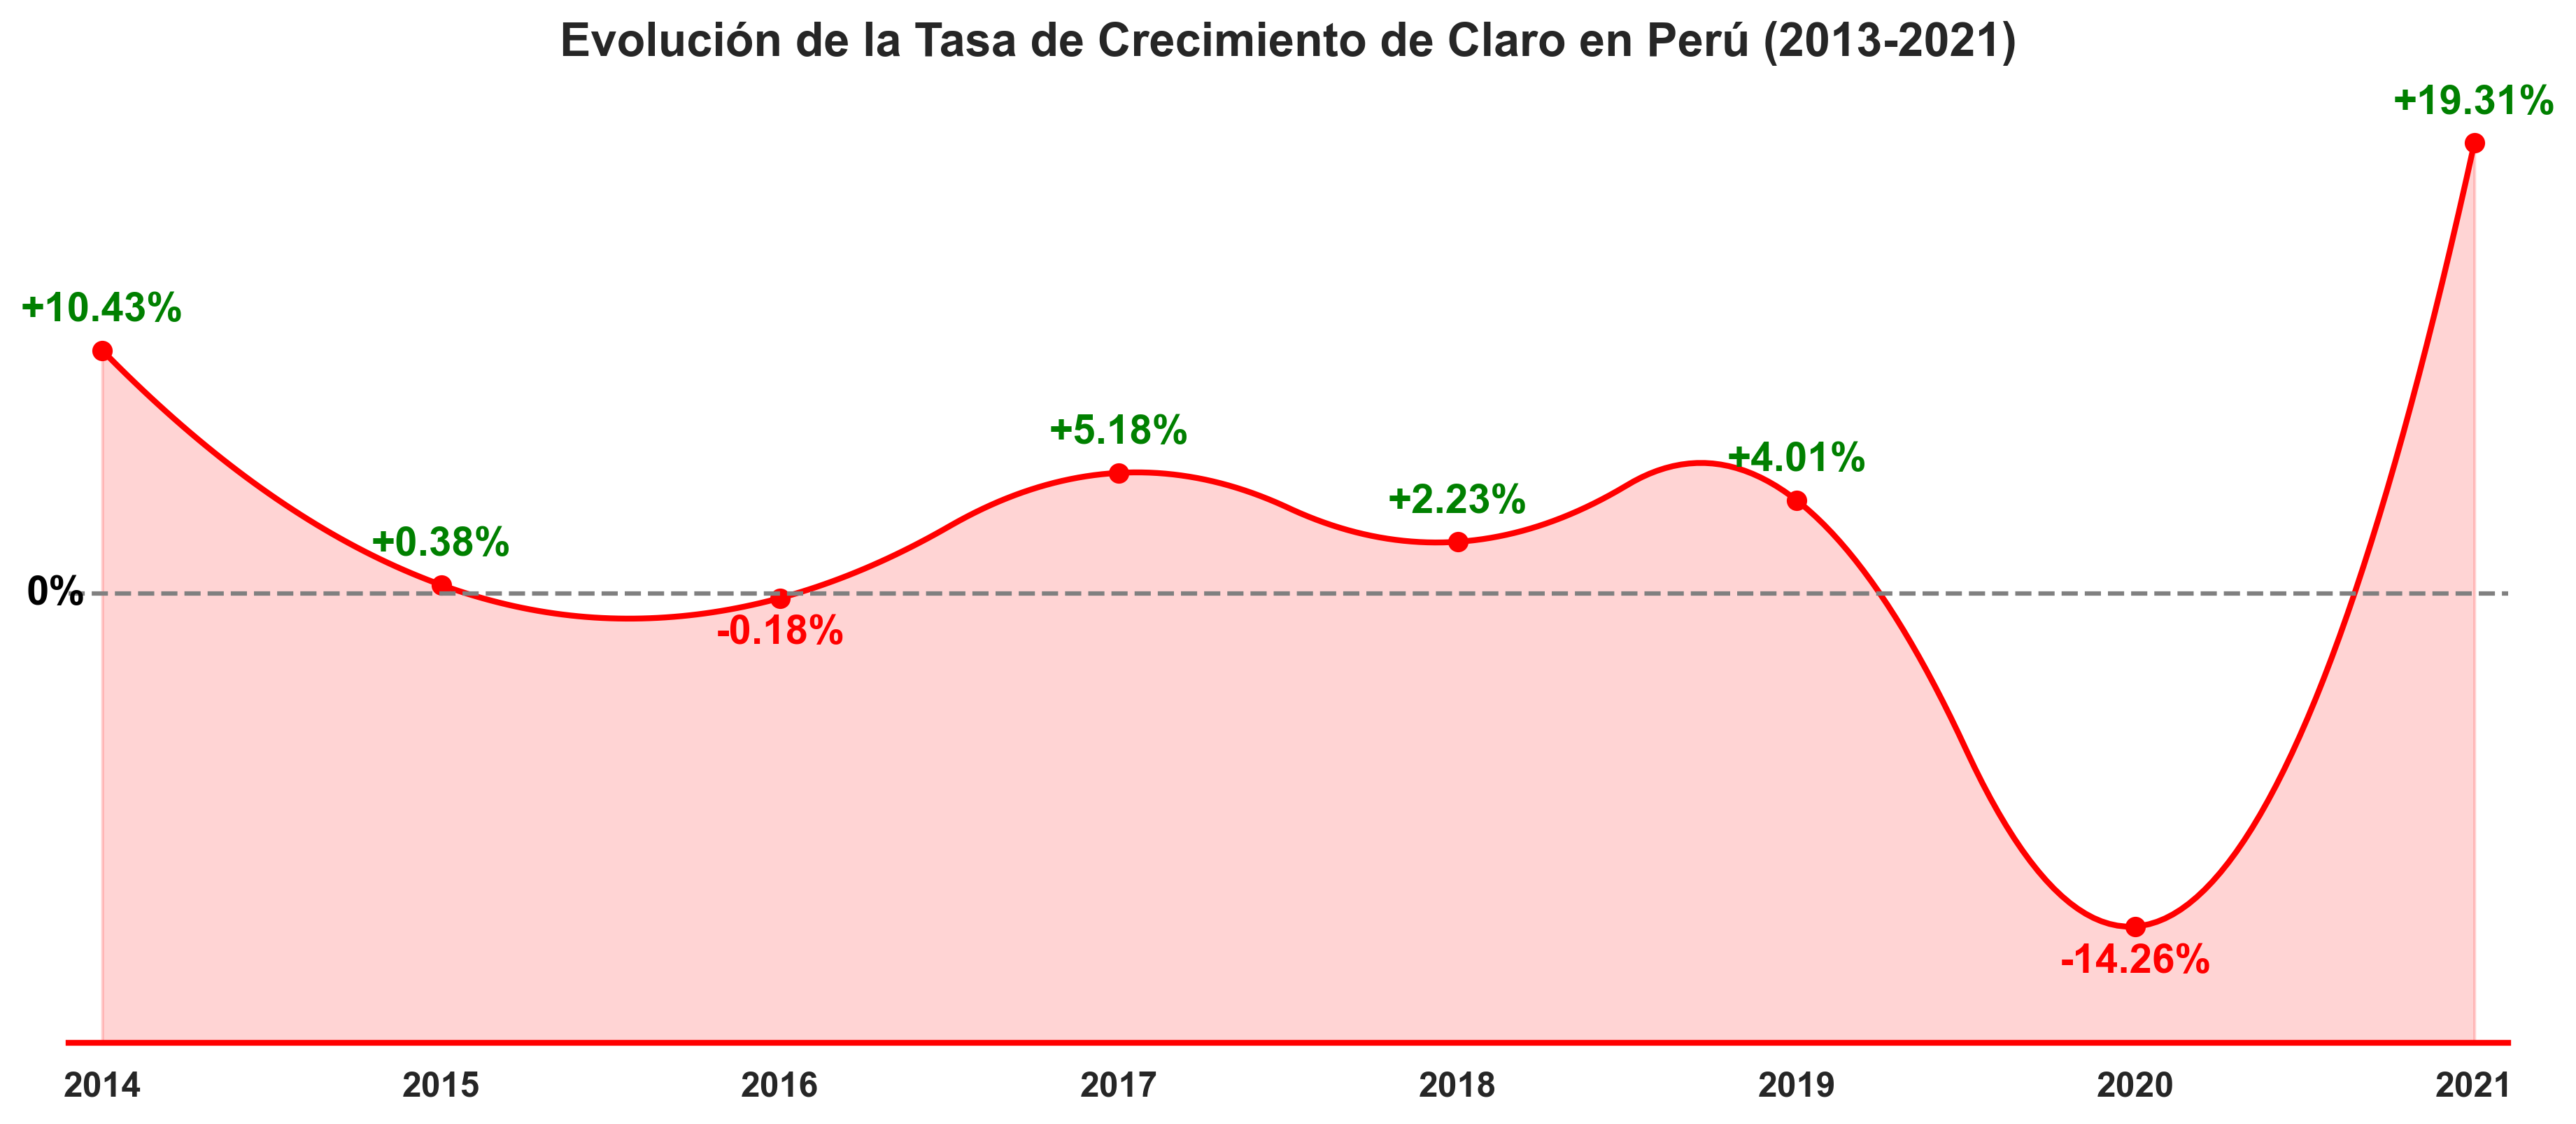

In [8]:
# Graficando la evolución para Claro
ingresos_claro_df = ingresos_claro.dropna().sort_values(by='Año')
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(15, 6), dpi=300)
x = ingresos_claro_df['Año']
y = ingresos_claro_df['Tasa de crecimiento(%)']

# Crear una línea suavizada
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=2)  # B-spline de grado 2
y_smooth = spl(x_new)

plt.plot(x_new, y_smooth, color='red', linewidth=2)
plt.scatter(x, y, color='red')  # Puntos originales

# Añadir etiquetas a los puntos
for x_val, y_val in zip(x, y):
    if y_val > 0:
        plt.text(x_val, y_val + 0.9, f'+{y_val:.2f}%', ha='center', va='bottom', fontsize=14, weight='bold', color='green')
    else:
        plt.text(x_val, y_val - 0.7, f'{y_val:.2f}%', ha='center', va='top', fontsize=14, weight='bold', color='red')

# Ajustar los límites del eje y
plt.ylim(y.min() - 5, y.max() + 3)

# Ajustar los límites del eje x
plt.xlim(x.min()-0.1, x.max()+0.1)

# Crear un efecto desenfocado de color hacia abajo desde la línea del gráfico
ax = plt.gca()
ax.set_facecolor('white')
ax.patch.set_alpha(0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('red')
    spine.set_linewidth(2)
    spine.set_visible(True)

# Rellenar el área bajo la curva con un gradiente de color uniforme
plt.fill_between(x_new, y_smooth, y.min() - 5, color='red', alpha=0.17)

sns.despine(left=True)
plt.title('Evolución de la Tasa de Crecimiento de Claro en Perú (2013-2021)', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.text(x.min()-0.05, 0, '0%', ha='right', va='center', fontsize=14, color='black', weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.gca().set_yticklabels([])

# Mostrar el gráfico
plt.show()

### **📊 Evolución del Crecimiento de Claro en Perú (2013-2021)** <img src="image.png" alt="alt text" width="40" height="40"> 

Este gráfico muestra la **Tasa de Crecimiento** de Claro en Perú entre 2013 y 2021. A continuación, se destacan los puntos más relevantes:

#### **📈 Puntos de Crecimiento Positivo**
- **2014:** 🟢 **+10.43%** - Un inicio sólido con un crecimiento fuerte.
- **2015:** 🟢 **+0.38%** - Crecimiento mínimo, pero aún positivo.
- **2017:** 🟢 **+5.18%** - Buen repunte después de una ligera caída en 2016.
- **2018:** 🟢 **+2.23%** - El crecimiento se mantiene estable, aunque moderado.
- **2019:** 🟢 **+4.01%** - Otro repunte al alza antes de la caída de 2020.
- **2021:** 🟢 **+19.31%** - 🤩 ¡Recuperación impresionante después del golpe en 2020!

#### **📉 Punto de Crecimiento Negativo**
- **2016:** 🔴 **-0.18%** - Pequeña contracción, casi inapreciable.
- **2020:** 🔴 **-14.26%** - 😓 Impacto severo debido a la pandemia, la mayor caída observada.

#### **📌 Observaciones Generales**
- El **pico más alto** de crecimiento ocurre en **2021** con **+19.31%**, mostrando una clara recuperación tras la crisis.
- La **caída más pronunciada** ocurre en **2020** con un **-14.26%**, posiblemente debido al impacto de la pandemia.
- Desde **2014**, Claro muestra una **tendencia fluctuante**, con un crecimiento positivo y caídas ocasionales, especialmente en **2016** y **2020**.

---

**Conclusión:**  
A pesar del fuerte retroceso en **2020**, Claro experimenta una **recuperación significativa** en **2021**, alcanzando su tasa de crecimiento más alta en el período observado.

3. **¿Cual es el % de ingresos del mercado de los 6 competidores tanto en 2013 como en 2021? (stacked bars o barras apiladas o bien cuadrados proporcionales)**

In [9]:
# Calculando el porcentaje de participación de mercado de los 6 competidores en el mercado de telecomunicaciones en el Perú
ingresos_compañias = ingresos.groupby(['Año', 'Compañia']).agg({'Ingresos soles': 'sum'}).reset_index()
ingresos_compañias['Porcentaje de participación(%)'] = ingresos_compañias.groupby('Año')['Ingresos soles'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)
ingresos_compañias.head()

,Año,Compañia,Ingresos soles,Porcentaje de participación(%)
0,2013,Claro,4922299998,32.286927
1,2013,DirectTV,190496464,1.249527
2,2013,Entel,824485891,5.408065
3,2013,Movistar,8829692000,57.916751
4,2013,Otros,478514778,3.138730


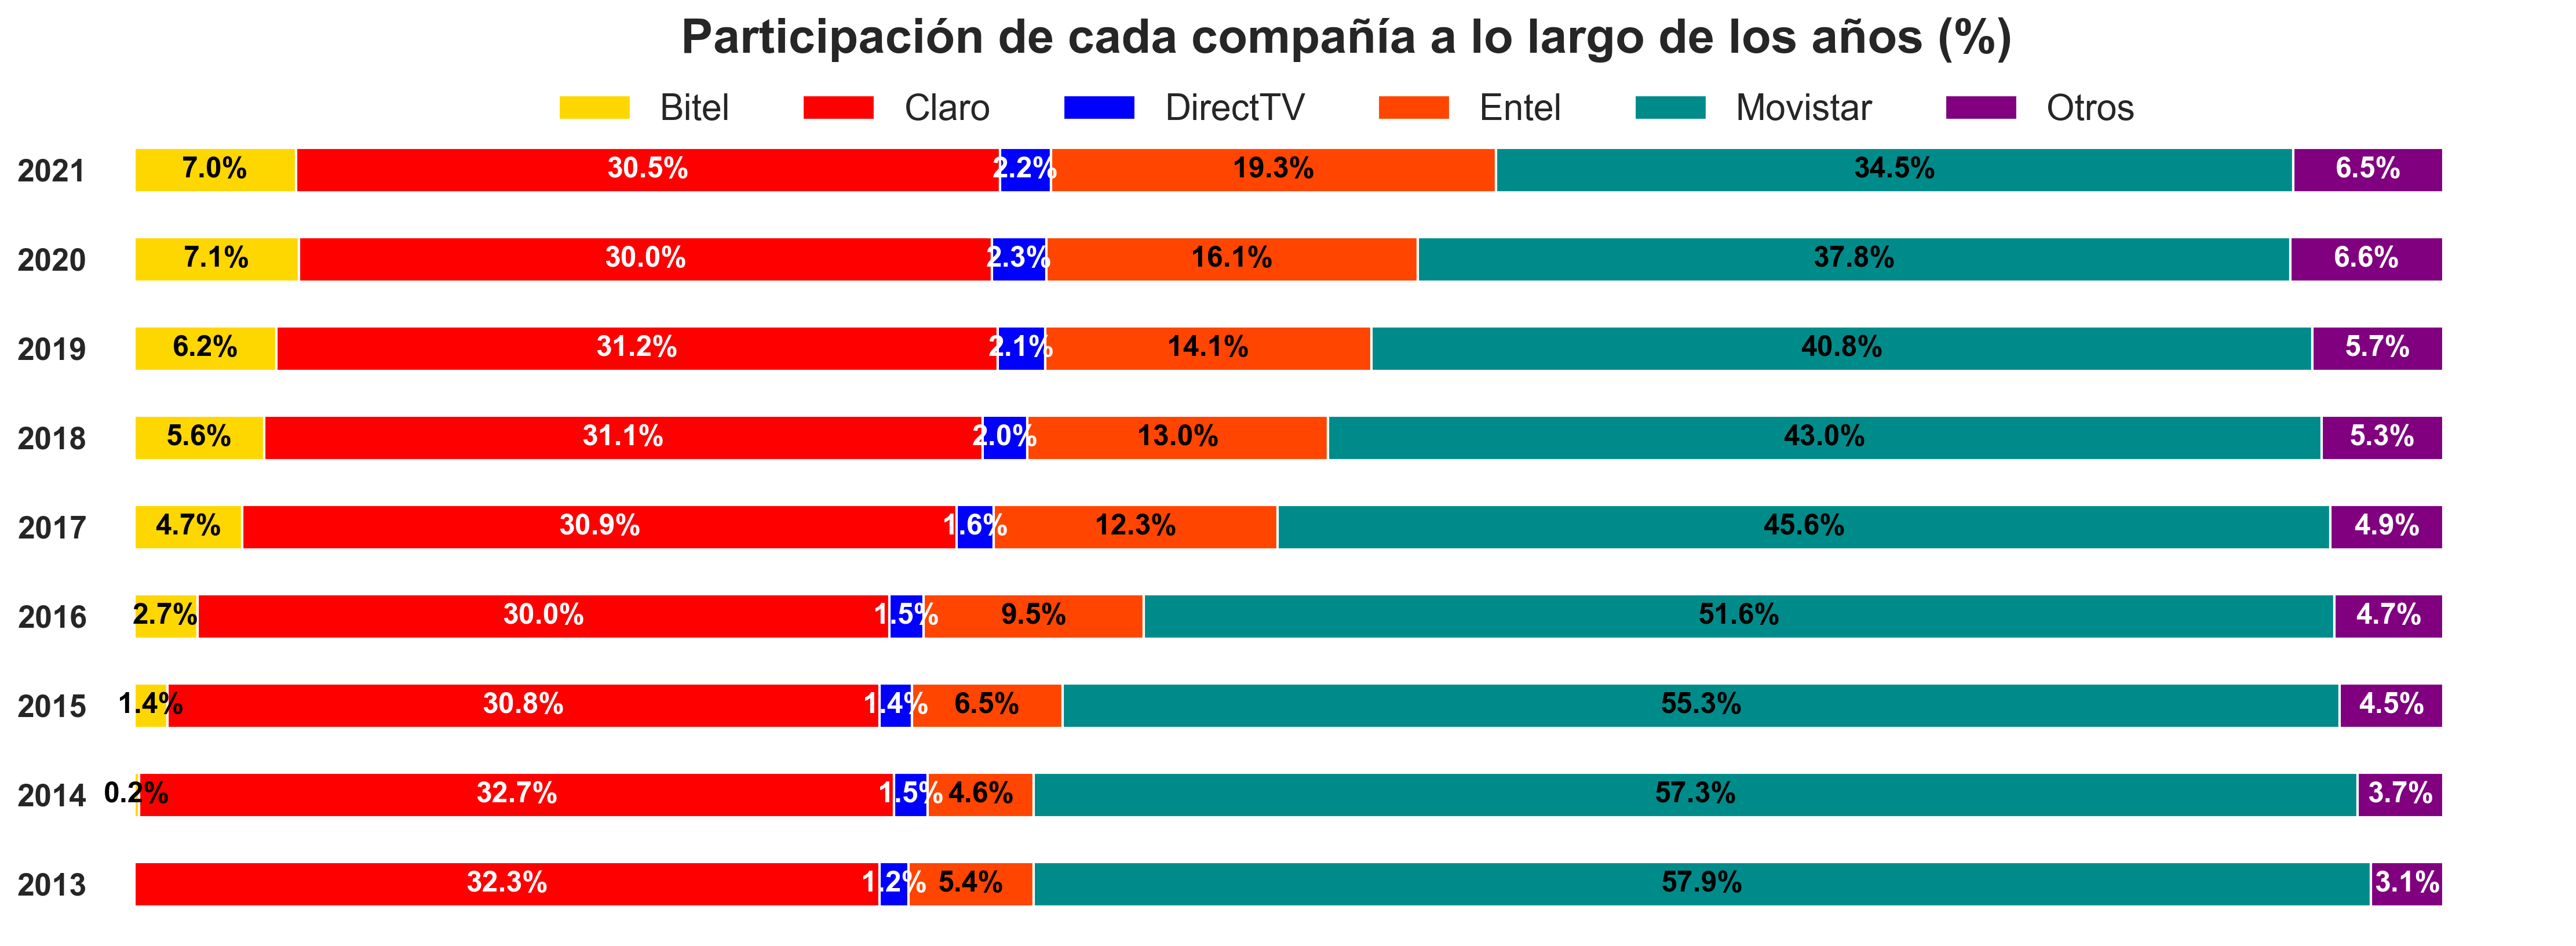

In [10]:
# Gráfico de barras apiladas de la participación de mercado de las compañías de telecomunicaciones en Perú
df_pivot = ingresos_compañias.pivot(index='Año', columns='Compañia', values='Porcentaje de participación(%)').fillna(0)
# Definir una lista de colores personalizados
colors = ['#FFD700', '#FF0000', '#0000FF', 'orangered', 'darkcyan', '#800080']  # Colores para Bitel, Claro, DirectTV, Entel, Movistar, Otros

# Crear el gráfico de barras apiladas vertical
sns.set_theme(style='white', palette='bright')
fig, ax = plt.subplots(figsize=(18, 6), dpi=300) 

# Crear las barras apiladas con mayor largo
df_pivot.plot(kind='barh', stacked=True, color=colors, ax=ax)  

# Añadir etiquetas y título
sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participación de cada compañía a lo largo de los años (%)', fontsize=20, weight='bold', pad=30)  

# Añadir los porcentajes dentro de las barras
for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
    if container.get_label() in ['DirectTV', 'Claro', 'Otros']:
        ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=12, weight='bold')
    else:
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=12, weight='bold')

# Mover la leyenda debajo del título
ax.legend(bbox_to_anchor=(0.5, 1.08), loc='upper center', ncol=6, fontsize=15, facecolor='white', edgecolor='white')
plt.gca().set_xticklabels([])
ax.spines['left'].set_position(('outward', 10))
plt.yticks(fontsize=13, weight='bold')

# Mostrar el gráfico
plt.show()


In [11]:
# Filtrar los datos para los años 2013 y 2021
df_filtered = ingresos_compañias[ingresos_compañias['Año'].isin([2013, 2021])]

# Pivotar el DataFrame para tener los años como índice y las compañías como columnas
df_pivot = df_filtered.pivot(index='Año', columns='Compañia', values='Porcentaje de participación(%)').fillna(0).reset_index()

# Definir los colores para las compañías
colors = {
    'Bitel': '#FFD700',
    'Claro': '#FF0000',
    'DirectTV': '#0000FF',
    'Entel': 'orangered',
    'Movistar': 'darkcyan',
    'Otros': '#800080'
}

# Crear el TreeMap para 2013
fig_2013 = px.treemap(
    df_pivot[df_pivot['Año'] == 2013].melt(id_vars='Año', var_name='Compañia', value_name='Porcentaje'),
    path=['Compañia'],
    values='Porcentaje',
    color='Compañia',
    color_discrete_map=colors,
    title='Participación de mercado en 2013'
)

# Crear el TreeMap para 2021
fig_2021 = px.treemap(
    df_pivot[df_pivot['Año'] == 2021].melt(id_vars='Año', var_name='Compañia', value_name='Porcentaje'),
    path=['Compañia'],
    values='Porcentaje',
    color='Compañia',
    color_discrete_map=colors,
    title='Participación de mercado en 2021'
)

# Mostrar los gráficos
fig_2013.show()
fig_2021.show()